In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read xls file into a pandas dataframe
file = pd.read_excel("Superstore.xls")
#print data
file

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
#check if there is any missing value
file.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
#to show any missing value by sum every column
file.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
#basic summary of the dataframe
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
file.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [7]:
#what categories we have
file["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [8]:
#isolate only data related to furniture
furn= file.loc[file["Category"]=="Furniture"]
#isolate only data related to Office Supplies
office_supp = file.loc[file['Category'] == 'Office Supplies']

In [9]:
#time span, when was the beginning and end
#year-month-day
furn["Order Date"].min(),furn["Order Date"].max()

(Timestamp('2011-01-07 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [10]:
#time span, when was the beginning and end
#year-month-day
office_supp['Order Date'].min(), office_supp['Order Date'].max()

(Timestamp('2011-01-04 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [11]:
office_supp = office_supp[['Order Date','Sales']]
office_supp

,Order Date,Sales
2,2013-06-13,14.620
4,2012-10-11,22.368
6,2011-06-09,7.280
8,2011-06-09,18.504
9,2011-06-09,114.900
...,...,...
9982,2013-09-23,35.560
9984,2012-05-17,31.500
9985,2012-05-17,55.600
9992,2014-02-27,29.600


In [12]:
furn = furn[['Order Date','Sales']]
furn

,Order Date,Sales
0,2013-11-09,261.9600
1,2013-11-09,731.9400
3,2012-10-11,957.5775
5,2011-06-09,48.8600
10,2011-06-09,1706.1840
...,...,...
9962,2012-03-19,383.4656
9964,2013-12-06,13.4000
9980,2012-09-06,85.9800
9989,2011-01-22,25.2480


In [13]:
office_supp = office_supp.sort_values('Order Date')
#grouping data by the order data and focusing on sales data
office_supp = office_supp.groupby('Order Date')['Sales'].sum().reset_index()
office_supp

,Order Date,Sales
0,2011-01-04,16.448
1,2011-01-05,288.060
2,2011-01-06,19.536
3,2011-01-07,685.340
4,2011-01-08,10.430
...,...,...
1144,2014-12-27,814.594
1145,2014-12-28,13.248
1146,2014-12-29,1091.244
1147,2014-12-30,282.440


In [14]:
furn = furn.sort_values('Order Date')
#grouping data by the order data and focusing on sales data
furn = furn.groupby('Order Date')['Sales'].sum().reset_index()
furn

,Order Date,Sales
0,2011-01-07,2573.8200
1,2011-01-08,76.7280
2,2011-01-11,51.9400
3,2011-01-12,9.9400
4,2011-01-14,879.9390
...,...,...
885,2014-12-25,1393.4940
886,2014-12-26,832.4540
887,2014-12-29,551.2568
888,2014-12-30,2330.7180


In [15]:
#indexing for time series data
office_supp1 = office_supp.set_index('Order Date')
office_supp1

,Sales
Order Date,
2011-01-04,16.448
2011-01-05,288.060
2011-01-06,19.536
2011-01-07,685.340
2011-01-08,10.430
...,...
2014-12-27,814.594
2014-12-28,13.248
2014-12-29,1091.244


In [16]:
#indexing for time series data
furn1 = furn.set_index('Order Date')
furn1

,Sales
Order Date,
2011-01-07,2573.8200
2011-01-08,76.7280
2011-01-11,51.9400
2011-01-12,9.9400
2011-01-14,879.9390
...,...
2014-12-25,1393.4940
2014-12-26,832.4540
2014-12-29,551.2568


In [17]:
#converting our daily values to our monthly
#we'll use the start of each month as the timestamp

monthly_supp = office_supp1['Sales'].resample('MS').sum()
monthly_supp

Order Date
2011-01-01     4851.080
2011-02-01     1071.724
2011-03-01     8605.879
2011-04-01    11155.074
2011-05-01     7135.624
2011-06-01    12953.037
2011-07-01    15121.208
2011-08-01    11379.462
2011-09-01    27423.298
2011-10-01     7211.128
2011-11-01    26862.436
2011-12-01    18006.462
2012-01-01     1808.780
2012-02-01     5426.787
2012-03-01    15823.827
2012-04-01    12558.558
2012-05-01     9113.736
2012-06-01    10647.747
2012-07-01     4719.939
2012-08-01    11735.108
2012-09-01    19305.767
2012-10-01     8673.410
2012-11-01    21218.130
2012-12-01    16201.674
2013-01-01     5299.682
2013-02-01     6683.246
2013-03-01    17458.035
2013-04-01    10639.735
2013-05-01    13006.898
2013-06-01    10901.856
2013-07-01    12677.274
2013-08-01     9218.912
2013-09-01    23285.742
2013-10-01    14798.984
2013-11-01    21428.072
2013-12-01    38112.154
2014-01-01    21703.681
2014-02-01     7390.152
2014-03-01    14317.418
2014-04-01    14921.853
2014-05-01    14137.790
2014-

In [18]:
#converting our daily values to our monthly
#we'll use the start of each month as the timestamp

monthly_furn = furn1['Sales'].resample('MS').sum()
monthly_furn

Order Date
2011-01-01     5951.8590
2011-02-01     2130.3240
2011-03-01    14573.9560
2011-04-01     7944.8370
2011-05-01     6912.7870
2011-06-01    13206.1256
2011-07-01    10821.0510
2011-08-01     7320.3465
2011-09-01    23816.4808
2011-10-01    12304.2470
2011-11-01    21564.8727
2011-12-01    30645.9665
2012-01-01    11739.9416
2012-02-01     3319.1260
2012-03-01    12315.0310
2012-04-01    10475.6985
2012-05-01     9374.9505
2012-06-01     7714.1790
2012-07-01    13674.4200
2012-08-01     9638.5922
2012-09-01    26273.0230
2012-10-01    12026.6235
2012-11-01    30880.8325
2012-12-01    23085.8192
2013-01-01     7622.7430
2013-02-01     3925.5510
2013-03-01    12473.0960
2013-04-01    13405.5900
2013-05-01    15031.1880
2013-06-01    12026.8550
2013-07-01    13199.3110
2013-08-01    13619.3003
2013-09-01    26738.9609
2013-10-01    10130.7720
2013-11-01    33659.3838
2013-12-01    37068.6850
2014-01-01     5964.0320
2014-02-01     6866.3374
2014-03-01    10597.3320
2014-04-01    

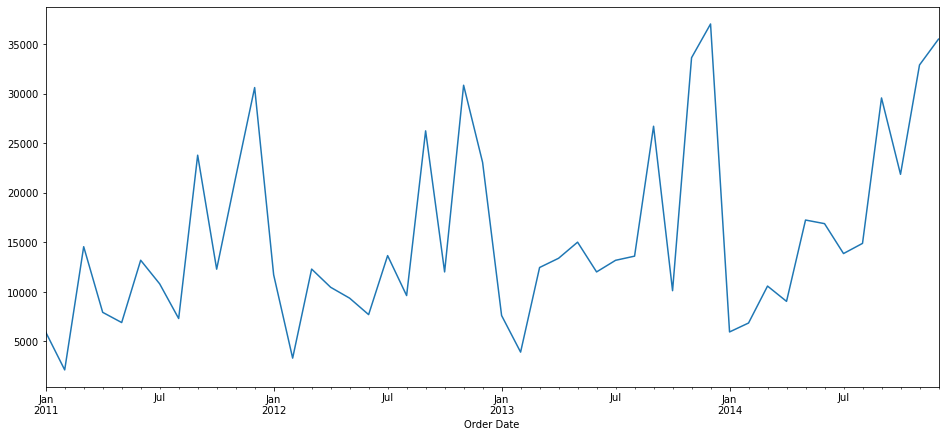

In [19]:
monthly_furn.plot(figsize = (16, 7))
plt.show()

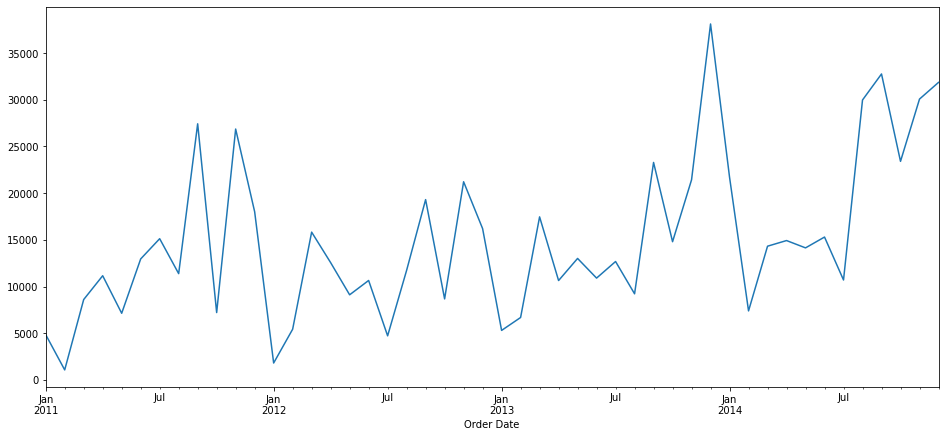

In [20]:
monthly_supp.plot(figsize = (16, 7))
plt.show()

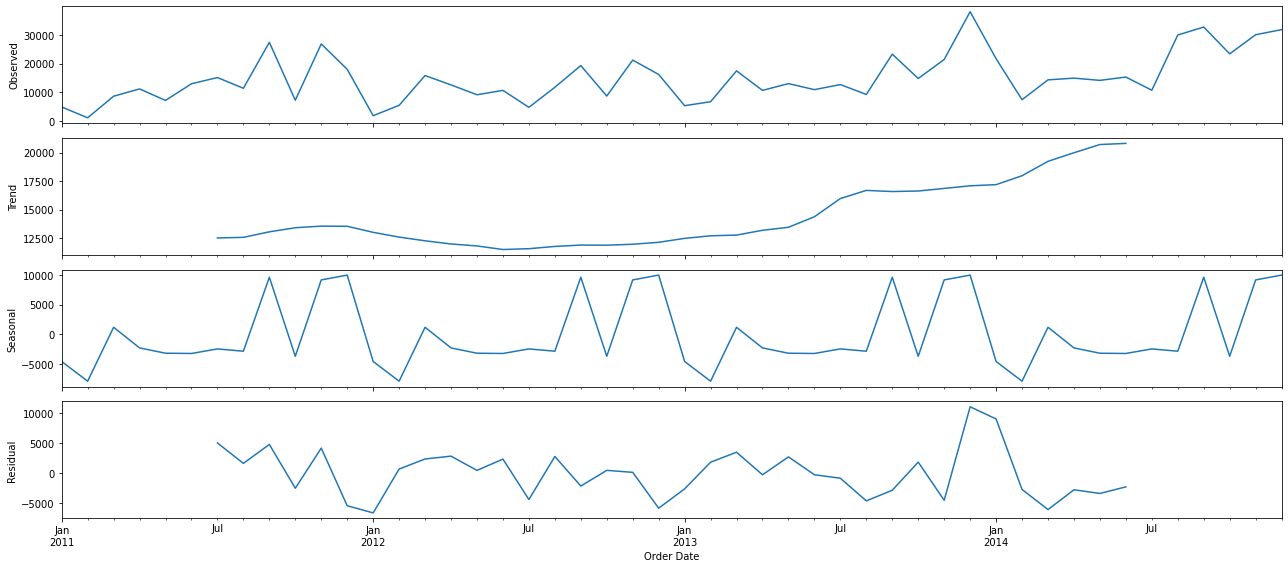

In [21]:
#adjusting the plot size
from pylab import rcParams
rcParams["figure.figsize"] = 18,8

#creating a decomposition visualization
decomposition = sm.tsa.seasonal_decompose(monthly_supp, model="additive")
fig = decomposition.plot()
plt.show()

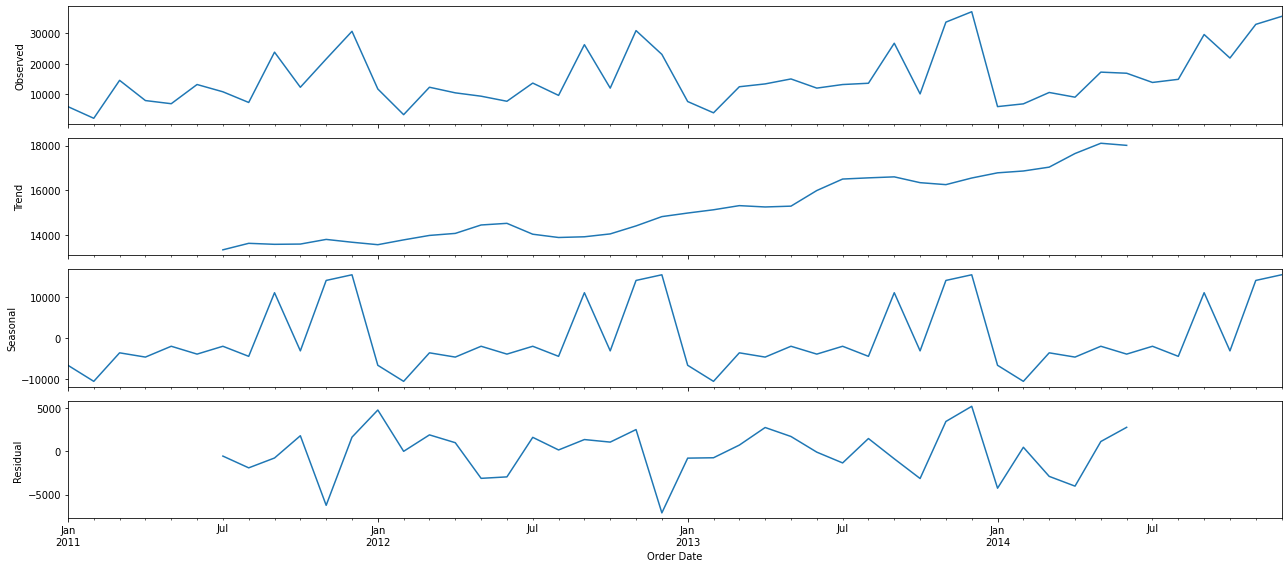

In [22]:
rcParams["figure.figsize"] = 18,8

#creating a decomposition visualization
decomposition = sm.tsa.seasonal_decompose(monthly_furn, model="additive")
fig = decomposition.plot()
plt.show()

In [23]:
furn = furn.groupby(pd.Grouper(key='Order Date',freq='M'))['Sales'].sum()
furn=furn.to_frame()
office_supp = office_supp.groupby(pd.Grouper(key='Order Date',freq='M'))['Sales'].sum()
office_supp=office_supp.to_frame()

In [24]:
furn

,Sales
Order Date,
2011-01-31,5951.8590
2011-02-28,2130.3240
2011-03-31,14573.9560
2011-04-30,7944.8370
2011-05-31,6912.7870
2011-06-30,13206.1256
2011-07-31,10821.0510
2011-08-31,7320.3465
2011-09-30,23816.4808


In [25]:
office_supp

,Sales
Order Date,
2011-01-31,4851.080
2011-02-28,1071.724
2011-03-31,8605.879
2011-04-30,11155.074
2011-05-31,7135.624
2011-06-30,12953.037
2011-07-31,15121.208
2011-08-31,11379.462
2011-09-30,27423.298


In [26]:
# the simple moving average over a period of 10 years
furn['Sales 4 SMA'] = furn.Sales.rolling(window=4).mean()
office_supp['Sales 4 SMA'] = office_supp.Sales.rolling(window=4).mean()

In [27]:
#output of Furn SMA
furn

,Sales,Sales 4 SMA
Order Date,,
2011-01-31,5951.8590,NaN
2011-02-28,2130.3240,NaN
2011-03-31,14573.9560,NaN
2011-04-30,7944.8370,7650.244000
2011-05-31,6912.7870,7890.476000
2011-06-30,13206.1256,10659.426400
2011-07-31,10821.0510,9721.200150
2011-08-31,7320.3465,9565.077525
2011-09-30,23816.4808,13791.000975


In [28]:
#output of office_supp SMA
office_supp

,Sales,Sales 4 SMA
Order Date,,
2011-01-31,4851.080,NaN
2011-02-28,1071.724,NaN
2011-03-31,8605.879,NaN
2011-04-30,11155.074,6420.93925
2011-05-31,7135.624,6992.07525
2011-06-30,12953.037,9962.40350
2011-07-31,15121.208,11591.23575
2011-08-31,11379.462,11647.33275
2011-09-30,27423.298,16719.25125


Text(0.5, 0, 'Order Date')

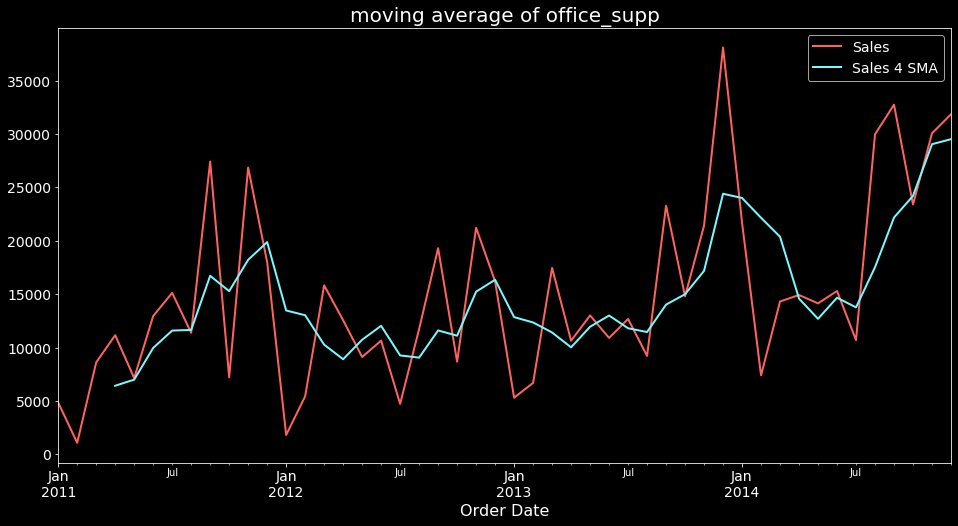

In [29]:
# colors for the line plot
plt.style.use(['dark_background'])
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
office_supp.plot(color=colors, linewidth=2, figsize=(16,8))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Sales', 'Sales 4 SMA'], fontsize=14)

# title and labels
plt.title('moving average of office_supp', fontsize=20)
plt.xlabel('Order Date', fontsize=16)


Text(0.5, 0, 'Order Date')

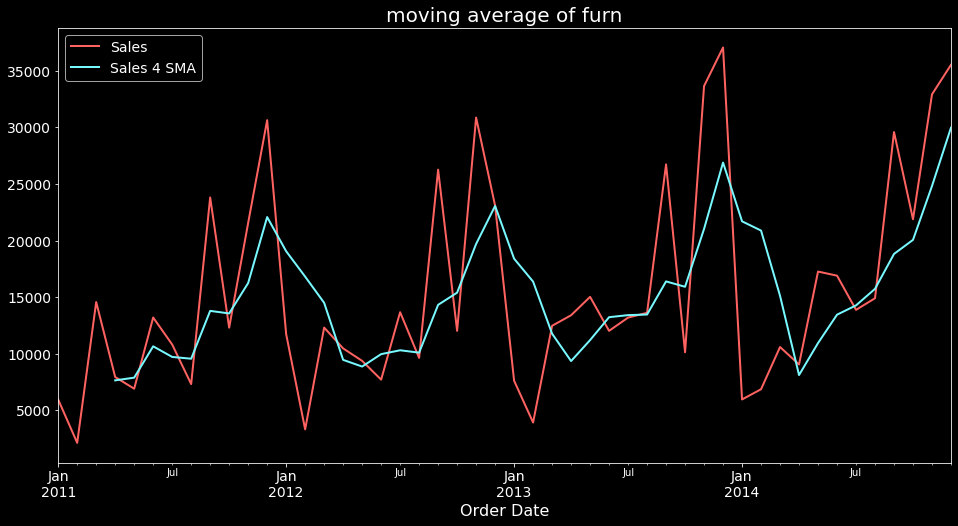

In [30]:
# colors for the line plot
plt.style.use(['dark_background'])
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
furn.plot(color=colors, linewidth=2, figsize=(16,8))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Sales', 'Sales 4 SMA'], fontsize=14)

# title and labels
plt.title('moving average of furn', fontsize=20)
plt.xlabel('Order Date', fontsize=16)


In [31]:
# smoothing factor - 0.1
furn['EMA_0.1'] = furn.Sales.ewm(alpha=0.1, adjust=False).mean()
# smoothing factor - 0.5
furn['EMA_0.5'] = furn.Sales.ewm(alpha=0.5, adjust=False).mean()

# smoothing factor - 0.1
office_supp['EMA_0.1'] = office_supp.Sales.ewm(alpha=0.1, adjust=False).mean()
# smoothing factor - 0.5
office_supp['EMA_0.5'] = office_supp.Sales.ewm(alpha=0.5, adjust=False).mean()

In [32]:
furn

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-31,5951.8590,NaN,5951.859000,5951.859000
2011-02-28,2130.3240,NaN,5569.705500,4041.091500
2011-03-31,14573.9560,NaN,6470.130550,9307.523750
2011-04-30,7944.8370,7650.244000,6617.601195,8626.180375
2011-05-31,6912.7870,7890.476000,6647.119776,7769.483688
2011-06-30,13206.1256,10659.426400,7303.020358,10487.804644
2011-07-31,10821.0510,9721.200150,7654.823422,10654.427822
2011-08-31,7320.3465,9565.077525,7621.375730,8987.387161
2011-09-30,23816.4808,13791.000975,9240.886237,16401.933980


In [33]:
office_supp

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-31,4851.080,NaN,4851.080000,4851.080000
2011-02-28,1071.724,NaN,4473.144400,2961.402000
2011-03-31,8605.879,NaN,4886.417860,5783.640500
2011-04-30,11155.074,6420.93925,5513.283474,8469.357250
2011-05-31,7135.624,6992.07525,5675.517527,7802.490625
2011-06-30,12953.037,9962.40350,6403.269474,10377.763813
2011-07-31,15121.208,11591.23575,7275.063327,12749.485906
2011-08-31,11379.462,11647.33275,7685.503194,12064.473953
2011-09-30,27423.298,16719.25125,9659.282675,19743.885977


Text(0.5, 0, 'order date')

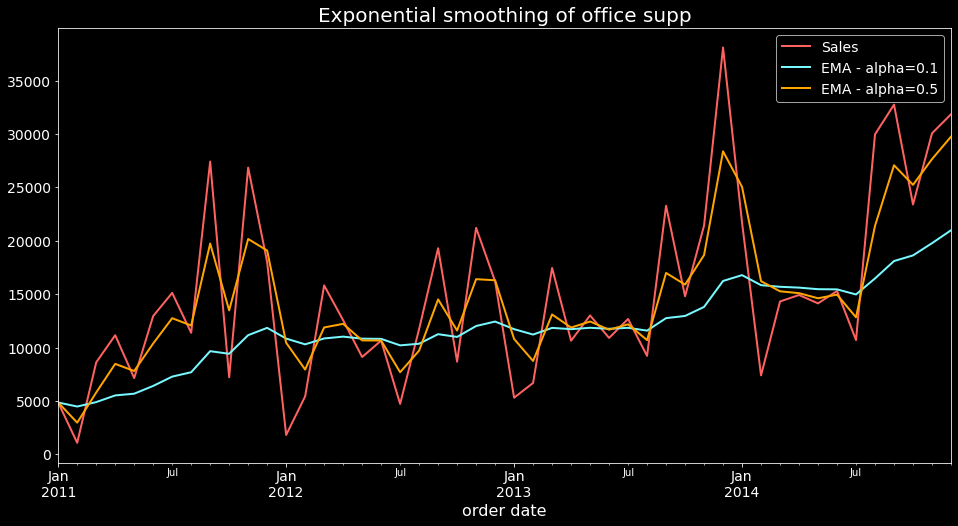

In [34]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff','orange']

# line plot - the yearly average air temperature in Barcelona
office_supp[['Sales', 'EMA_0.1', 'EMA_0.5']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.1', 'EMA - alpha=0.5'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of office supp', fontsize=20)
plt.xlabel('order date', fontsize=16)

Text(0.5, 0, 'order date')

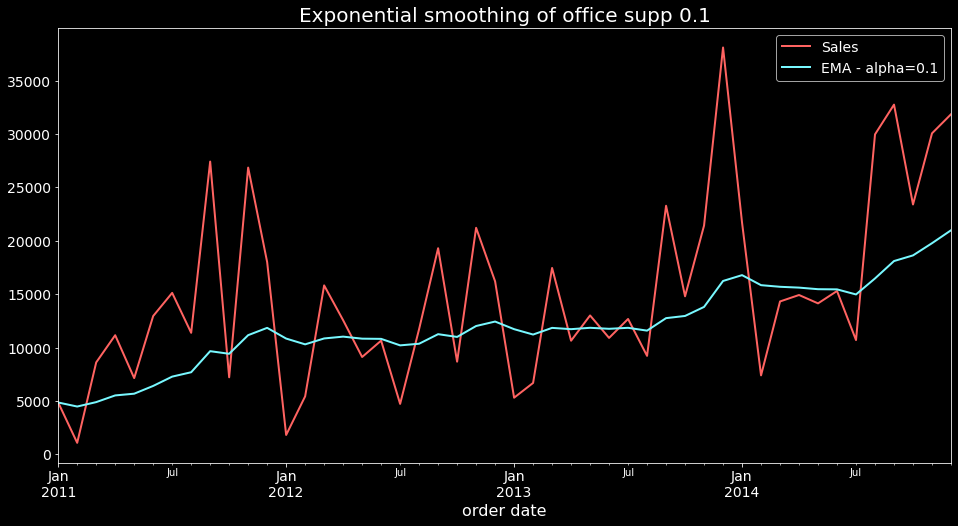

In [35]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
office_supp[['Sales', 'EMA_0.1']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.1'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of office supp 0.1', fontsize=20)
plt.xlabel('order date', fontsize=16)

Text(0.5, 0, 'order date')

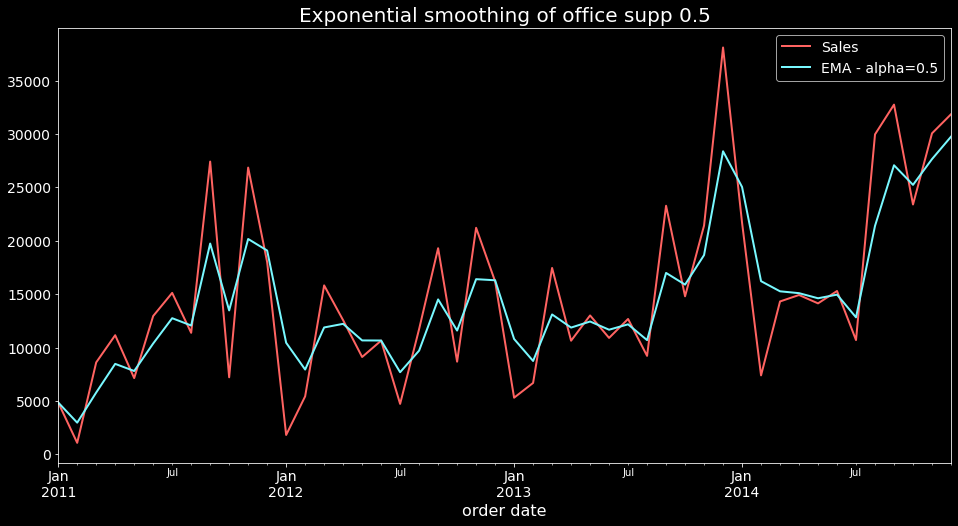

In [36]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
office_supp[['Sales', 'EMA_0.5']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.5'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of office supp 0.5', fontsize=20)
plt.xlabel('order date', fontsize=16)

Text(0.5, 0, 'order date')

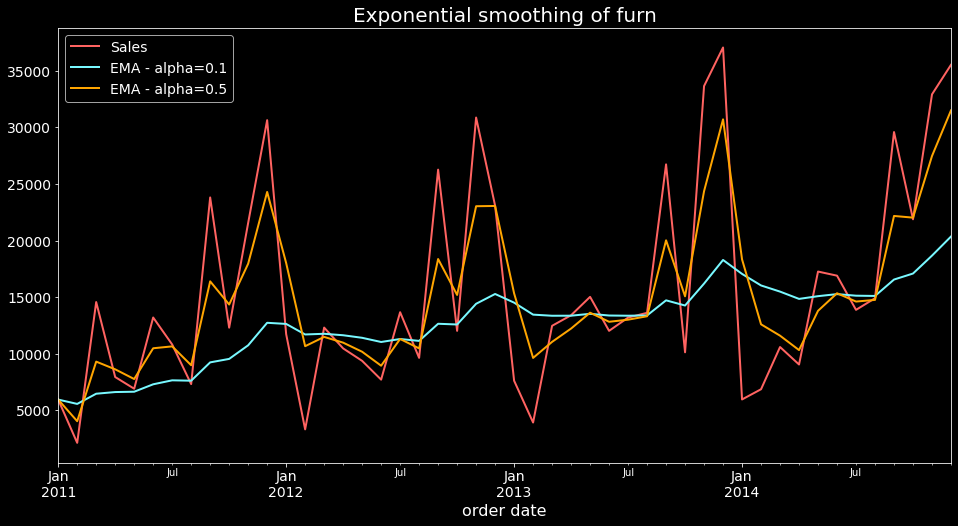

In [37]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff','orange']

# line plot - the yearly average air temperature in Barcelona
furn[['Sales', 'EMA_0.1', 'EMA_0.5']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.1', 'EMA - alpha=0.5'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of furn', fontsize=20)
plt.xlabel('order date', fontsize=16)

Text(0.5, 0, 'order date')

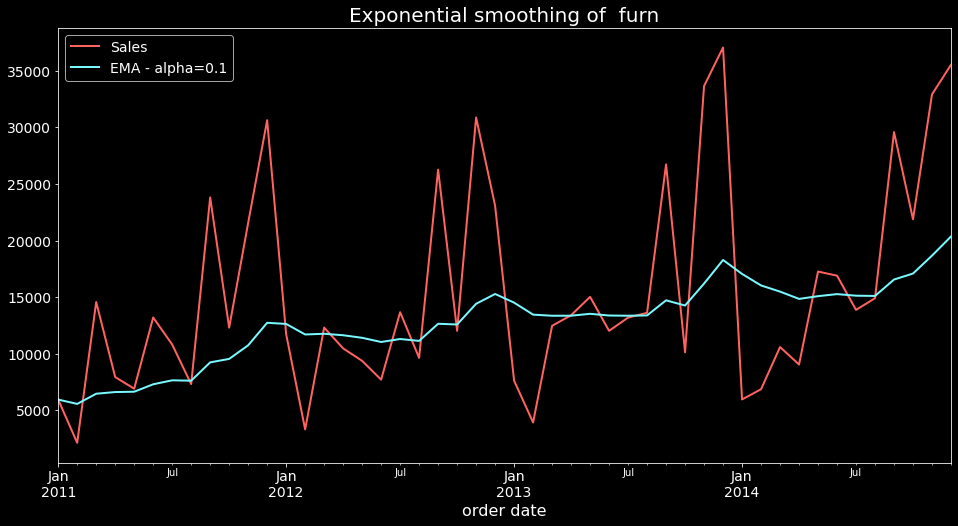

In [38]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
furn[['Sales', 'EMA_0.1']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.1'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of  furn', fontsize=20)
plt.xlabel('order date', fontsize=16)

Text(0.5, 0, 'order date')

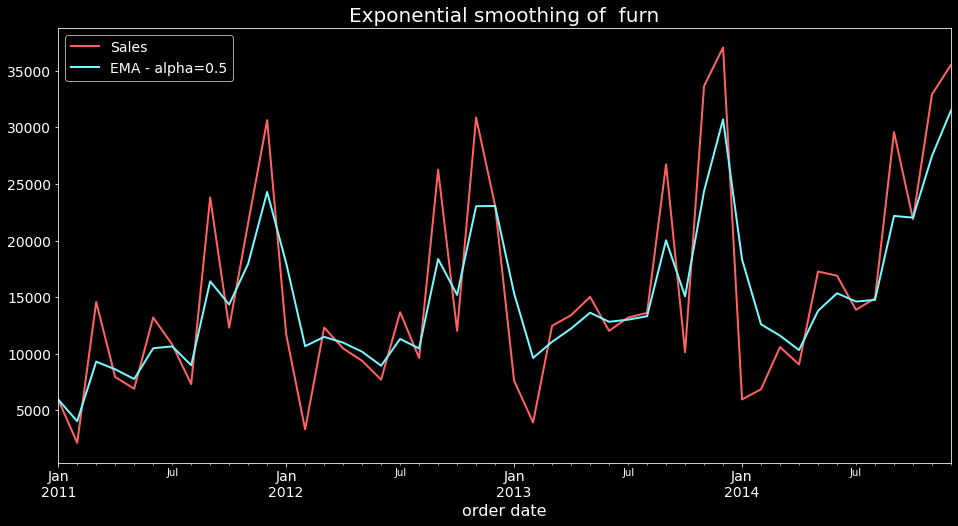

In [39]:
# colors for the line plot
#colors = ['green', 'orchid', 'orange']
colors = ['#ff6361', '#78f8ff']

# line plot - the yearly average air temperature in Barcelona
furn[['Sales', 'EMA_0.5']].plot(color=colors, linewidth=2, figsize=(16,8), )

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Sales', 'EMA - alpha=0.5'], fontsize=14)

# title and labels
plt.title('Exponential smoothing of  furn', fontsize=20)
plt.xlabel('order date', fontsize=16)

In [40]:
#............................................ STEP 4 (mehrail)...................................................
#................................................................................................................
#................................................................................................................

In [41]:
#to extract furniture and office sales from category
realsale=file[~(file['Category'] == 'Technology')]
realsale

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,9986,CA-2012-100251,2012-05-17,2012-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.6000,4,0.00,16.1240
9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9992,9993,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [42]:
furn

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-31,5951.8590,NaN,5951.859000,5951.859000
2011-02-28,2130.3240,NaN,5569.705500,4041.091500
2011-03-31,14573.9560,NaN,6470.130550,9307.523750
2011-04-30,7944.8370,7650.244000,6617.601195,8626.180375
2011-05-31,6912.7870,7890.476000,6647.119776,7769.483688
2011-06-30,13206.1256,10659.426400,7303.020358,10487.804644
2011-07-31,10821.0510,9721.200150,7654.823422,10654.427822
2011-08-31,7320.3465,9565.077525,7621.375730,8987.387161
2011-09-30,23816.4808,13791.000975,9240.886237,16401.933980


In [43]:
#check if there is any missing value
furn.isnull()

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-31,False,True,False,False
2011-02-28,False,True,False,False
2011-03-31,False,True,False,False
2011-04-30,False,False,False,False
2011-05-31,False,False,False,False
2011-06-30,False,False,False,False
2011-07-31,False,False,False,False
2011-08-31,False,False,False,False
2011-09-30,False,False,False,False


In [44]:
#to show any missing value by sum every column
furn.isnull().sum()

Sales          0
Sales 4 SMA    3
EMA_0.1        0
EMA_0.5        0
dtype: int64

In [45]:
#to replace missing value with the first existing value forward
newfurn = furn.fillna(method = 'bfill')
newfurn

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-31,5951.8590,7650.244000,5951.859000,5951.859000
2011-02-28,2130.3240,7650.244000,5569.705500,4041.091500
2011-03-31,14573.9560,7650.244000,6470.130550,9307.523750
2011-04-30,7944.8370,7650.244000,6617.601195,8626.180375
2011-05-31,6912.7870,7890.476000,6647.119776,7769.483688
2011-06-30,13206.1256,10659.426400,7303.020358,10487.804644
2011-07-31,10821.0510,9721.200150,7654.823422,10654.427822
2011-08-31,7320.3465,9565.077525,7621.375730,8987.387161
2011-09-30,23816.4808,13791.000975,9240.886237,16401.933980


In [46]:
ytFURN = newfurn["Sales"]
ytFURN 

Order Date
2011-01-31     5951.8590
2011-02-28     2130.3240
2011-03-31    14573.9560
2011-04-30     7944.8370
2011-05-31     6912.7870
2011-06-30    13206.1256
2011-07-31    10821.0510
2011-08-31     7320.3465
2011-09-30    23816.4808
2011-10-31    12304.2470
2011-11-30    21564.8727
2011-12-31    30645.9665
2012-01-31    11739.9416
2012-02-29     3319.1260
2012-03-31    12315.0310
2012-04-30    10475.6985
2012-05-31     9374.9505
2012-06-30     7714.1790
2012-07-31    13674.4200
2012-08-31     9638.5922
2012-09-30    26273.0230
2012-10-31    12026.6235
2012-11-30    30880.8325
2012-12-31    23085.8192
2013-01-31     7622.7430
2013-02-28     3925.5510
2013-03-31    12473.0960
2013-04-30    13405.5900
2013-05-31    15031.1880
2013-06-30    12026.8550
2013-07-31    13199.3110
2013-08-31    13619.3003
2013-09-30    26738.9609
2013-10-31    10130.7720
2013-11-30    33659.3838
2013-12-31    37068.6850
2014-01-31     5964.0320
2014-02-28     6866.3374
2014-03-31    10597.3320
2014-04-30    

In [47]:
ftFURNmovingaverage = newfurn["Sales 4 SMA"]
ftFURNmovingaverage

Order Date
2011-01-31     7650.244000
2011-02-28     7650.244000
2011-03-31     7650.244000
2011-04-30     7650.244000
2011-05-31     7890.476000
2011-06-30    10659.426400
2011-07-31     9721.200150
2011-08-31     9565.077525
2011-09-30    13791.000975
2011-10-31    13565.531325
2011-11-30    16251.486750
2011-12-31    22082.891750
2012-01-31    19063.756950
2012-02-29    16817.476700
2012-03-31    14505.016275
2012-04-30     9462.449275
2012-05-31     8871.201500
2012-06-30     9969.964750
2012-07-31    10309.812000
2012-08-31    10100.535425
2012-09-30    14325.053550
2012-10-31    15403.164675
2012-11-30    19704.767800
2012-12-31    23066.574550
2013-01-31    18404.004550
2013-02-28    16378.736425
2013-03-31    11776.802300
2013-04-30     9356.745000
2013-05-31    11208.856250
2013-06-30    13234.182250
2013-07-31    13415.736000
2013-08-31    13469.163575
2013-09-30    16396.106800
2013-10-31    15922.086050
2013-11-30    21037.104250
2013-12-31    26899.450425
2014-01-31    217

In [48]:
#to get delta t (error) for furnature - sale
errorFURNmovingaverage = ytFURN - ftFURNmovingaverage
errorFURNmovingaverage

Order Date
2011-01-31    -1698.385000
2011-02-28    -5519.920000
2011-03-31     6923.712000
2011-04-30      294.593000
2011-05-31     -977.689000
2011-06-30     2546.699200
2011-07-31     1099.850850
2011-08-31    -2244.731025
2011-09-30    10025.479825
2011-10-31    -1261.284325
2011-11-30     5313.385950
2011-12-31     8563.074750
2012-01-31    -7323.815350
2012-02-29   -13498.350700
2012-03-31    -2189.985275
2012-04-30     1013.249225
2012-05-31      503.749000
2012-06-30    -2255.785750
2012-07-31     3364.608000
2012-08-31     -461.943225
2012-09-30    11947.969450
2012-10-31    -3376.541175
2012-11-30    11176.064700
2012-12-31       19.244650
2013-01-31   -10781.261550
2013-02-28   -12453.185425
2013-03-31      696.293700
2013-04-30     4048.845000
2013-05-31     3822.331750
2013-06-30    -1207.327250
2013-07-31     -216.425000
2013-08-31      150.136725
2013-09-30    10342.854100
2013-10-31    -5791.314050
2013-11-30    12622.279550
2013-12-31    10169.234575
2014-01-31   -157

In [49]:
for i in errorFURNmovingaverage:
  print(i)

-1698.3850000000002
-5519.919999999999
6923.712
294.59300000000076
-977.6889999999994
2546.699200000001
1099.8508500000007
-2244.731025000002
10025.479825000002
-1261.2843250000042
5313.385949999996
8563.074749999992
-7323.815350000003
-13498.350700000003
-2189.9852750000045
1013.2492249999941
503.7489999999925
-2255.7857500000055
3364.6079999999947
-461.94322500000635
11947.969449999995
-3376.5411750000058
11176.064699999992
19.24464999999691
-10781.261550000001
-12453.185425
696.2936999999965
4048.8449999999975
3822.3317499999994
-1207.3272500000076
-216.42500000000473
150.1367250000003
10342.8541
-5791.314049999995
12622.27955000001
10169.234574999999
-15741.686199999996
-14023.272149999997
-4526.764599999995
932.6198250000016
6321.077575000001
3447.9540000000015
-394.3464499999991
-830.938224999998
10774.851825000009
1815.8604000000014
8097.463200000006
5550.688799999996


In [50]:
#to calculate LAD for furnature - sale
ladFURNmovigaverage = abs(errorFURNmovingaverage.max())
ladFURNmovigaverage

12622.27955000001

In [51]:
#to calculate MSE for furnature - sale
counter1 = 0
n1 = 0
for i in errorFURNmovingaverage:
  counter1 = counter1 + (i*i)
  n1 = n1 + 1
mseFURNmovigaverage = counter1 / n1  
mseFURNmovigaverage

47462310.50601911

In [52]:
#to get absolute value of delta t in furnature - sale to use in MAPE rule
absoluteFURNDeltat = abs(errorFURNmovingaverage)
absoluteFURNDeltat

Order Date
2011-01-31     1698.385000
2011-02-28     5519.920000
2011-03-31     6923.712000
2011-04-30      294.593000
2011-05-31      977.689000
2011-06-30     2546.699200
2011-07-31     1099.850850
2011-08-31     2244.731025
2011-09-30    10025.479825
2011-10-31     1261.284325
2011-11-30     5313.385950
2011-12-31     8563.074750
2012-01-31     7323.815350
2012-02-29    13498.350700
2012-03-31     2189.985275
2012-04-30     1013.249225
2012-05-31      503.749000
2012-06-30     2255.785750
2012-07-31     3364.608000
2012-08-31      461.943225
2012-09-30    11947.969450
2012-10-31     3376.541175
2012-11-30    11176.064700
2012-12-31       19.244650
2013-01-31    10781.261550
2013-02-28    12453.185425
2013-03-31      696.293700
2013-04-30     4048.845000
2013-05-31     3822.331750
2013-06-30     1207.327250
2013-07-31      216.425000
2013-08-31      150.136725
2013-09-30    10342.854100
2013-10-31     5791.314050
2013-11-30    12622.279550
2013-12-31    10169.234575
2014-01-31    157

In [53]:
#to calculate MAPE for furnature - sale
mape = mean_absolute_error(ytFURN, ftFURNmovingaverage)
mape

5174.148403125

In [54]:
ftFURNexpi = newfurn["EMA_0.1"]
ftFURNexpi

Order Date
2011-01-31     5951.859000
2011-02-28     5569.705500
2011-03-31     6470.130550
2011-04-30     6617.601195
2011-05-31     6647.119776
2011-06-30     7303.020358
2011-07-31     7654.823422
2011-08-31     7621.375730
2011-09-30     9240.886237
2011-10-31     9547.222313
2011-11-30    10748.987352
2011-12-31    12738.685267
2012-01-31    12638.810900
2012-02-29    11706.842410
2012-03-31    11767.661269
2012-04-30    11638.464992
2012-05-31    11412.113543
2012-06-30    11042.320089
2012-07-31    11305.530080
2012-08-31    11138.836292
2012-09-30    12652.254963
2012-10-31    12589.691816
2012-11-30    14418.805885
2012-12-31    15285.507216
2013-01-31    14519.230795
2013-02-28    13459.862815
2013-03-31    13361.186134
2013-04-30    13365.626520
2013-05-31    13532.182668
2013-06-30    13381.649901
2013-07-31    13363.416011
2013-08-31    13389.004440
2013-09-30    14724.000086
2013-10-31    14264.677278
2013-11-30    16204.147930
2013-12-31    18290.601637
2014-01-31    170

In [55]:
#to get delta t (error) for exponential (i) - sale
errorFURNexpi = ytFURN - ftFURNexpi
errorFURNexpi

Order Date
2011-01-31        0.000000
2011-02-28    -3439.381500
2011-03-31     8103.825450
2011-04-30     1327.235805
2011-05-31      265.667224
2011-06-30     5903.105242
2011-07-31     3166.227578
2011-08-31     -301.029230
2011-09-30    14575.594563
2011-10-31     2757.024687
2011-11-30    10815.885348
2011-12-31    17907.281233
2012-01-31     -898.869300
2012-02-29    -8387.716410
2012-03-31      547.369731
2012-04-30    -1162.766492
2012-05-31    -2037.163043
2012-06-30    -3328.141089
2012-07-31     2368.889920
2012-08-31    -1500.244092
2012-09-30    13620.768037
2012-10-31     -563.068316
2012-11-30    16462.026615
2012-12-31     7800.311984
2013-01-31    -6896.487795
2013-02-28    -9534.311815
2013-03-31     -888.090134
2013-04-30       39.963480
2013-05-31     1499.005332
2013-06-30    -1354.794901
2013-07-31     -164.105011
2013-08-31      230.295860
2013-09-30    12014.960814
2013-10-31    -4133.905278
2013-11-30    17455.235870
2013-12-31    18778.083363
2014-01-31   -110

In [56]:
for i in errorFURNexpi:
  print(i)

0.0
-3439.3814999999995
8103.82545
1327.2358050000003
265.6672245
5903.10524205
3166.227577845001
-301.0292299395014
14575.594563054452
2757.0246867490023
10815.885348074102
17907.281233266687
-898.8693000599778
-8387.71641005398
547.3697309514173
-1162.7664921437226
-2037.163042929351
-3328.1410886364147
2368.889920227224
-1500.2440917954991
13620.768037384052
-563.0683163543563
16462.026615281073
7800.31198375297
-6896.487794622326
-9534.311815160094
-888.0901336440857
39.96347972032345
1499.0053317482925
-1354.7949014265432
-164.1050112838875
230.29585984450387
12014.96081386005
-4133.90527752595
17455.23587022665
18778.083363203976
-11093.912673116422
-9172.446545804778
-4897.3067512243
-5797.72066610187
2174.809170508315
1629.749403457483
-1252.3079668882674
-202.2884701994426
13037.59757682051
4791.502599138454
14250.979259224612
15175.06835330214


In [57]:
#to calculate LAD for exponential (i) - sale
ladFURexpi = abs(errorFURNexpi.max())
ladFURexpi

18778.083363203976

In [58]:
#to calculate MSE for exponential (i) - sale
counter3 = 0
n3 = 0
for l in errorFURNexpi:
  counter3 = counter3 + (l*l)
  n3 = n3 + 1
mseFURNexpi = counter3 / n3  
mseFURNexpi

67872205.43805328

In [59]:
#to get absolute value of delta t in exponential (i) - sale to use in MAPE rule
absoluteFURNDeltatexpi = abs(errorFURNexpi)
absoluteFURNDeltatexpi

Order Date
2011-01-31        0.000000
2011-02-28     3439.381500
2011-03-31     8103.825450
2011-04-30     1327.235805
2011-05-31      265.667224
2011-06-30     5903.105242
2011-07-31     3166.227578
2011-08-31      301.029230
2011-09-30    14575.594563
2011-10-31     2757.024687
2011-11-30    10815.885348
2011-12-31    17907.281233
2012-01-31      898.869300
2012-02-29     8387.716410
2012-03-31      547.369731
2012-04-30     1162.766492
2012-05-31     2037.163043
2012-06-30     3328.141089
2012-07-31     2368.889920
2012-08-31     1500.244092
2012-09-30    13620.768037
2012-10-31      563.068316
2012-11-30    16462.026615
2012-12-31     7800.311984
2013-01-31     6896.487795
2013-02-28     9534.311815
2013-03-31      888.090134
2013-04-30       39.963480
2013-05-31     1499.005332
2013-06-30     1354.794901
2013-07-31      164.105011
2013-08-31      230.295860
2013-09-30    12014.960814
2013-10-31     4133.905278
2013-11-30    17455.235870
2013-12-31    18778.083363
2014-01-31    110

In [60]:
#to calculate MAPE for exponential (i) - sale
mape = mean_absolute_error(ytFURN, ftFURNexpi)
mape

5910.510874543794

In [61]:
ftFURNexpii = newfurn["EMA_0.5"]
ftFURNexpii

Order Date
2011-01-31     5951.859000
2011-02-28     4041.091500
2011-03-31     9307.523750
2011-04-30     8626.180375
2011-05-31     7769.483688
2011-06-30    10487.804644
2011-07-31    10654.427822
2011-08-31     8987.387161
2011-09-30    16401.933980
2011-10-31    14353.090490
2011-11-30    17958.981595
2011-12-31    24302.474048
2012-01-31    18021.207824
2012-02-29    10670.166912
2012-03-31    11492.598956
2012-04-30    10984.148728
2012-05-31    10179.549614
2012-06-30     8946.864307
2012-07-31    11310.642153
2012-08-31    10474.617177
2012-09-30    18373.820088
2012-10-31    15200.221794
2012-11-30    23040.527147
2012-12-31    23063.173174
2013-01-31    15342.958087
2013-02-28     9634.254543
2013-03-31    11053.675272
2013-04-30    12229.632636
2013-05-31    13630.410318
2013-06-30    12828.632659
2013-07-31    13013.971829
2013-08-31    13316.636065
2013-09-30    20027.798482
2013-10-31    15079.285241
2013-11-30    24369.334521
2013-12-31    30719.009760
2014-01-31    183

In [62]:
#to get delta t (error) for exponential (ii) - sale
errorFURNexpii = ytFURN - ftFURNexpii
errorFURNexpii

Order Date
2011-01-31        0.000000
2011-02-28    -1910.767500
2011-03-31     5266.432250
2011-04-30     -681.343375
2011-05-31     -856.696687
2011-06-30     2718.320956
2011-07-31      166.623178
2011-08-31    -1667.040661
2011-09-30     7414.546820
2011-10-31    -2048.843490
2011-11-30     3605.891105
2011-12-31     6343.492452
2012-01-31    -6281.266224
2012-02-29    -7351.040912
2012-03-31      822.432044
2012-04-30     -508.450228
2012-05-31     -804.599114
2012-06-30    -1232.685307
2012-07-31     2363.777847
2012-08-31     -836.024977
2012-09-30     7899.202912
2012-10-31    -3173.598294
2012-11-30     7840.305353
2012-12-31       22.646026
2013-01-31    -7720.215087
2013-02-28    -5708.703543
2013-03-31     1419.420728
2013-04-30     1175.957364
2013-05-31     1400.777682
2013-06-30     -801.777659
2013-07-31      185.339171
2013-08-31      302.664235
2013-09-30     6711.162418
2013-10-31    -4948.513241
2013-11-30     9290.049279
2013-12-31     6349.675240
2014-01-31   -123

In [63]:
for i in errorFURNexpii:
  print(i)

0.0
-1910.7674999999995
5266.43225
-681.3433749999995
-856.6966874999998
2718.3209562499997
166.62317812500078
-1667.0406609375013
7414.54681953125
-2048.843490234378
3605.891104882812
6343.492452441402
-6281.266223779296
-7351.040911889648
822.4320440551746
-508.4502279724129
-804.5991139862072
-1232.685306993103
2363.777846503448
-836.0249767482765
7899.202911625864
-3173.5982941870698
7840.305352906464
22.646026453236118
-7720.215086773382
-5708.703543386691
1419.4207283066553
1175.9573641533298
1400.7776820766649
-801.7776589616715
185.33917051916433
302.6642352595827
6711.162417629792
-4948.513241185103
9290.049279407453
6349.67523970372
-12377.48888014814
-5737.591740074069
-1003.2985700370336
-1273.9518350185172
3470.111732490741
1553.067616245371
-734.0675418773153
146.73772906134218
7417.622864530676
-148.0414677346671
5447.438666132668
4028.8232330663304


In [64]:
#to calculate LAD for exponential (ii) - sale
ladFURexpii = abs(errorFURNexpii.max())
ladFURexpii

9290.049279407453

In [65]:
#to calculate MSE for exponential (ii) - sale
counter5 = 0
n5 = 0
for q in errorFURNexpii:
  counter5 = counter5 + (q*q)
  n5 = n5 + 1
mseFURNexpii = counter5 / n5  
mseFURNexpii

20650039.35619487

In [66]:
#to get absolute value of delta t in exponential (ii)- sale to use in MAPE rule
absoluteFURNDeltatexpii = abs(errorFURNexpii)
absoluteFURNDeltatexpii

Order Date
2011-01-31        0.000000
2011-02-28     1910.767500
2011-03-31     5266.432250
2011-04-30      681.343375
2011-05-31      856.696687
2011-06-30     2718.320956
2011-07-31      166.623178
2011-08-31     1667.040661
2011-09-30     7414.546820
2011-10-31     2048.843490
2011-11-30     3605.891105
2011-12-31     6343.492452
2012-01-31     6281.266224
2012-02-29     7351.040912
2012-03-31      822.432044
2012-04-30      508.450228
2012-05-31      804.599114
2012-06-30     1232.685307
2012-07-31     2363.777847
2012-08-31      836.024977
2012-09-30     7899.202912
2012-10-31     3173.598294
2012-11-30     7840.305353
2012-12-31       22.646026
2013-01-31     7720.215087
2013-02-28     5708.703543
2013-03-31     1419.420728
2013-04-30     1175.957364
2013-05-31     1400.777682
2013-06-30      801.777659
2013-07-31      185.339171
2013-08-31      302.664235
2013-09-30     6711.162418
2013-10-31     4948.513241
2013-11-30     9290.049279
2013-12-31     6349.675240
2014-01-31    123

In [67]:
#to calculate MAPE for exponential (ii) - sale
mape = mean_absolute_error(ytFURN, ftFURNexpii)
mape

3357.6776090788044

In [68]:
#---------------------------------------------------for office-----------------------------------------------------

In [69]:
office_supp

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-31,4851.080,NaN,4851.080000,4851.080000
2011-02-28,1071.724,NaN,4473.144400,2961.402000
2011-03-31,8605.879,NaN,4886.417860,5783.640500
2011-04-30,11155.074,6420.93925,5513.283474,8469.357250
2011-05-31,7135.624,6992.07525,5675.517527,7802.490625
2011-06-30,12953.037,9962.40350,6403.269474,10377.763813
2011-07-31,15121.208,11591.23575,7275.063327,12749.485906
2011-08-31,11379.462,11647.33275,7685.503194,12064.473953
2011-09-30,27423.298,16719.25125,9659.282675,19743.885977


In [70]:
#check if there is any missing value
office_supp.isnull()

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-31,False,True,False,False
2011-02-28,False,True,False,False
2011-03-31,False,True,False,False
2011-04-30,False,False,False,False
2011-05-31,False,False,False,False
2011-06-30,False,False,False,False
2011-07-31,False,False,False,False
2011-08-31,False,False,False,False
2011-09-30,False,False,False,False


In [71]:
#to show any missing value by sum every column
office_supp.isnull().sum()

Sales          0
Sales 4 SMA    3
EMA_0.1        0
EMA_0.5        0
dtype: int64

In [72]:
#to replace missing value with the first existing value forward
newofficesupp = office_supp.fillna(method = 'bfill')
newofficesupp

,Sales,Sales 4 SMA,EMA_0.1,EMA_0.5
Order Date,,,,
2011-01-31,4851.080,6420.93925,4851.080000,4851.080000
2011-02-28,1071.724,6420.93925,4473.144400,2961.402000
2011-03-31,8605.879,6420.93925,4886.417860,5783.640500
2011-04-30,11155.074,6420.93925,5513.283474,8469.357250
2011-05-31,7135.624,6992.07525,5675.517527,7802.490625
2011-06-30,12953.037,9962.40350,6403.269474,10377.763813
2011-07-31,15121.208,11591.23575,7275.063327,12749.485906
2011-08-31,11379.462,11647.33275,7685.503194,12064.473953
2011-09-30,27423.298,16719.25125,9659.282675,19743.885977


In [73]:
ytOFFICE = newofficesupp["Sales"]
ytOFFICE 

Order Date
2011-01-31     4851.080
2011-02-28     1071.724
2011-03-31     8605.879
2011-04-30    11155.074
2011-05-31     7135.624
2011-06-30    12953.037
2011-07-31    15121.208
2011-08-31    11379.462
2011-09-30    27423.298
2011-10-31     7211.128
2011-11-30    26862.436
2011-12-31    18006.462
2012-01-31     1808.780
2012-02-29     5426.787
2012-03-31    15823.827
2012-04-30    12558.558
2012-05-31     9113.736
2012-06-30    10647.747
2012-07-31     4719.939
2012-08-31    11735.108
2012-09-30    19305.767
2012-10-31     8673.410
2012-11-30    21218.130
2012-12-31    16201.674
2013-01-31     5299.682
2013-02-28     6683.246
2013-03-31    17458.035
2013-04-30    10639.735
2013-05-31    13006.898
2013-06-30    10901.856
2013-07-31    12677.274
2013-08-31     9218.912
2013-09-30    23285.742
2013-10-31    14798.984
2013-11-30    21428.072
2013-12-31    38112.154
2014-01-31    21703.681
2014-02-28     7390.152
2014-03-31    14317.418
2014-04-30    14921.853
2014-05-31    14137.790
2014-

In [74]:
ftOFFICEmovingaverage = newofficesupp["Sales 4 SMA"]
ftOFFICEmovingaverage

Order Date
2011-01-31     6420.93925
2011-02-28     6420.93925
2011-03-31     6420.93925
2011-04-30     6420.93925
2011-05-31     6992.07525
2011-06-30     9962.40350
2011-07-31    11591.23575
2011-08-31    11647.33275
2011-09-30    16719.25125
2011-10-31    15283.77400
2011-11-30    18219.08100
2011-12-31    19875.83100
2012-01-31    13472.20150
2012-02-29    13026.11625
2012-03-31    10266.46400
2012-04-30     8904.48800
2012-05-31    10730.72700
2012-06-30    12035.96700
2012-07-31     9259.99500
2012-08-31     9054.13250
2012-09-30    11602.14025
2012-10-31    11108.55600
2012-11-30    15233.10375
2012-12-31    16349.74525
2013-01-31    12848.22400
2013-02-28    12350.68300
2013-03-31    11410.65925
2013-04-30    10020.17450
2013-05-31    11946.97850
2013-06-30    13001.63100
2013-07-31    11806.44075
2013-08-31    11451.23500
2013-09-30    14020.94600
2013-10-31    14995.22800
2013-11-30    17182.92750
2013-12-31    24406.23800
2014-01-31    24010.72275
2014-02-28    22158.51475
2

In [75]:
#to get delta t (error) for office MA - sale
errorOFFICEmovingaverage = ytOFFICE - ftOFFICEmovingaverage
errorOFFICEmovingaverage

Order Date
2011-01-31    -1569.85925
2011-02-28    -5349.21525
2011-03-31     2184.93975
2011-04-30     4734.13475
2011-05-31      143.54875
2011-06-30     2990.63350
2011-07-31     3529.97225
2011-08-31     -267.87075
2011-09-30    10704.04675
2011-10-31    -8072.64600
2011-11-30     8643.35500
2011-12-31    -1869.36900
2012-01-31   -11663.42150
2012-02-29    -7599.32925
2012-03-31     5557.36300
2012-04-30     3654.07000
2012-05-31    -1616.99100
2012-06-30    -1388.22000
2012-07-31    -4540.05600
2012-08-31     2680.97550
2012-09-30     7703.62675
2012-10-31    -2435.14600
2012-11-30     5985.02625
2012-12-31     -148.07125
2013-01-31    -7548.54200
2013-02-28    -5667.43700
2013-03-31     6047.37575
2013-04-30      619.56050
2013-05-31     1059.91950
2013-06-30    -2099.77500
2013-07-31      870.83325
2013-08-31    -2232.32300
2013-09-30     9264.79600
2013-10-31     -196.24400
2013-11-30     4245.14450
2013-12-31    13705.91600
2014-01-31    -2307.04175
2014-02-28   -14768.36275
2

In [76]:
for i in errorOFFICEmovingaverage:
  print(i)

-1569.8592500000004
-5349.21525
2184.9397500000005
4734.13475
143.54875000000084
2990.6335000000036
3529.972249999997
-267.87075000000186
10704.046750000005
-8072.646000000001
8643.354999999996
-1869.3689999999988
-11663.421499999995
-7599.329249999996
5557.362999999999
3654.0700000000015
-1616.9909999999982
-1388.2200000000012
-4540.056
2680.9755000000005
7703.626749999999
-2435.1460000000025
5985.026249999995
-148.07124999999724
-7548.542
-5667.437000000001
6047.375749999997
619.5605000000032
1059.9195000000036
-2099.7749999999996
870.8332500000015
-2232.3230000000003
9264.79600000001
-196.24399999999878
4245.1444999999985
13705.915999999994
-2307.0417499999894
-14768.362749999993
-6063.433249999989
338.5770000000066
1445.9867499999982
628.7150000000074
-3065.0444999999945
12446.375250000012
10576.911500000002
-805.6697500000009
1018.6974999999948
2332.9409999999953


In [77]:
#to calculate LAD for office - sale
ladOFFICEmovigaverage = abs(errorOFFICEmovingaverage.max())
ladOFFICEmovigaverage

13705.915999999994

In [78]:
#to calculate MSE for office - sale
counter7 = 0
n7 = 0
for t in errorOFFICEmovingaverage:
  counter7 = counter7 + (t*t)
  n7 = n7 + 1
mseOFFICENmovigaverage = counter7 / n7  
mseOFFICENmovigaverage

35090980.24747597

In [79]:
#to get absolute value of delta t in office - sale to use in MAPE rule
absoluteOFFICEDeltat = abs(errorOFFICEmovingaverage)
absoluteOFFICEDeltat

Order Date
2011-01-31     1569.85925
2011-02-28     5349.21525
2011-03-31     2184.93975
2011-04-30     4734.13475
2011-05-31      143.54875
2011-06-30     2990.63350
2011-07-31     3529.97225
2011-08-31      267.87075
2011-09-30    10704.04675
2011-10-31     8072.64600
2011-11-30     8643.35500
2011-12-31     1869.36900
2012-01-31    11663.42150
2012-02-29     7599.32925
2012-03-31     5557.36300
2012-04-30     3654.07000
2012-05-31     1616.99100
2012-06-30     1388.22000
2012-07-31     4540.05600
2012-08-31     2680.97550
2012-09-30     7703.62675
2012-10-31     2435.14600
2012-11-30     5985.02625
2012-12-31      148.07125
2013-01-31     7548.54200
2013-02-28     5667.43700
2013-03-31     6047.37575
2013-04-30      619.56050
2013-05-31     1059.91950
2013-06-30     2099.77500
2013-07-31      870.83325
2013-08-31     2232.32300
2013-09-30     9264.79600
2013-10-31      196.24400
2013-11-30     4245.14450
2013-12-31    13705.91600
2014-01-31     2307.04175
2014-02-28    14768.36275
2

In [80]:
#to calculate MAPE for office - sale
mape = mean_absolute_error(ytOFFICE, ftOFFICEmovingaverage)
mape

4466.406458333333

In [81]:
ftOFFICEexpi = newofficesupp["EMA_0.1"]
ftOFFICEexpi

Order Date
2011-01-31     4851.080000
2011-02-28     4473.144400
2011-03-31     4886.417860
2011-04-30     5513.283474
2011-05-31     5675.517527
2011-06-30     6403.269474
2011-07-31     7275.063327
2011-08-31     7685.503194
2011-09-30     9659.282675
2011-10-31     9414.467207
2011-11-30    11159.264086
2011-12-31    11843.983878
2012-01-31    10840.463490
2012-02-29    10299.095841
2012-03-31    10851.568957
2012-04-30    11022.267861
2012-05-31    10831.414675
2012-06-30    10813.047908
2012-07-31    10203.737017
2012-08-31    10356.874115
2012-09-30    11251.763404
2012-10-31    10993.928063
2012-11-30    12016.348257
2012-12-31    12434.880831
2013-01-31    11721.360948
2013-02-28    11217.549453
2013-03-31    11841.598008
2013-04-30    11721.411707
2013-05-31    11849.960336
2013-06-30    11755.149903
2013-07-31    11847.362313
2013-08-31    11584.517281
2013-09-30    12754.639753
2013-10-31    12959.074178
2013-11-30    13805.973960
2013-12-31    16236.591964
2014-01-31    167

In [82]:
#to get delta t (error) for exponential (i) - sale
errorOFFICEexpi = ytOFFICE - ftOFFICEexpi
errorOFFICEexpi

Order Date
2011-01-31        0.000000
2011-02-28    -3401.420400
2011-03-31     3719.461140
2011-04-30     5641.790526
2011-05-31     1460.106473
2011-06-30     6549.767526
2011-07-31     7846.144673
2011-08-31     3693.958806
2011-09-30    17764.015325
2011-10-31    -2203.339207
2011-11-30    15703.171914
2011-12-31     6162.478122
2012-01-31    -9031.683490
2012-02-29    -4872.308841
2012-03-31     4972.258043
2012-04-30     1536.290139
2012-05-31    -1717.678675
2012-06-30     -165.300908
2012-07-31    -5483.798017
2012-08-31     1378.233885
2012-09-30     8054.003596
2012-10-31    -2320.518063
2012-11-30     9201.781743
2012-12-31     3766.793169
2013-01-31    -6421.678948
2013-02-28    -4534.303453
2013-03-31     5616.436992
2013-04-30    -1081.676707
2013-05-31     1156.937664
2013-06-30     -853.293903
2013-07-31      829.911687
2013-08-31    -2365.605281
2013-09-30    10531.102247
2013-10-31     1839.909822
2013-11-30     7622.098040
2013-12-31    21875.562036
2014-01-31     49

In [83]:
for i in errorOFFICEexpi:
  print(i)

0.0
-3401.4204
3719.4611400000003
5641.790526
1460.1064734000001
6549.767526060003
7846.144673453996
3693.958806108596
17764.01532549774
-2203.3392070520367
15703.171913653163
6162.478122287852
-9031.683489940933
-4872.308840946841
4972.25804314784
1536.2901388330574
-1717.678675050247
-165.30090754522644
-5483.798016790702
1378.2338848883683
8054.003596399531
-2320.5180632404226
9201.781743083617
3766.7931687752607
-6421.678948102269
-4534.303453292042
5616.436992037157
-1081.6767071665545
1156.9376635501012
-853.2939028049132
829.9116874755819
-2365.605281271979
10531.10224685523
1839.9098221696986
7622.098039952725
21875.562035957446
4920.380132361712
-8453.83398087446
-1373.911182787011
-692.5285645083113
-1328.932408057486
-152.47386725172873
-4275.771180526559
13498.630937526104
14656.026543773489
4769.8393893961365
10293.262550456519
10870.055595410864


In [84]:
#to calculate LAD for exponential (i) - sale
ladOFFICEexpi = abs(errorOFFICEexpi.max())
ladOFFICEexpi

21875.562035957446

In [85]:
#to calculate MSE for exponential (i) - sale
counter9 = 0
n9 = 0
for w in errorOFFICEexpi:
  counter9 = counter9 + (w*w)
  n9 = n9 + 1
mseOFFICEexpi = counter9 / n9  
mseOFFICEexpi

54889351.03447241

In [86]:
#to get absolute value of delta t in exponential (i) - sale to use in MAPE rule
absoluteOFFICEDeltatexpi = abs(errorOFFICEexpi)
absoluteOFFICEDeltatexpi

Order Date
2011-01-31        0.000000
2011-02-28     3401.420400
2011-03-31     3719.461140
2011-04-30     5641.790526
2011-05-31     1460.106473
2011-06-30     6549.767526
2011-07-31     7846.144673
2011-08-31     3693.958806
2011-09-30    17764.015325
2011-10-31     2203.339207
2011-11-30    15703.171914
2011-12-31     6162.478122
2012-01-31     9031.683490
2012-02-29     4872.308841
2012-03-31     4972.258043
2012-04-30     1536.290139
2012-05-31     1717.678675
2012-06-30      165.300908
2012-07-31     5483.798017
2012-08-31     1378.233885
2012-09-30     8054.003596
2012-10-31     2320.518063
2012-11-30     9201.781743
2012-12-31     3766.793169
2013-01-31     6421.678948
2013-02-28     4534.303453
2013-03-31     5616.436992
2013-04-30     1081.676707
2013-05-31     1156.937664
2013-06-30      853.293903
2013-07-31      829.911687
2013-08-31     2365.605281
2013-09-30    10531.102247
2013-10-31     1839.909822
2013-11-30     7622.098040
2013-12-31    21875.562036
2014-01-31     49

In [87]:
#to calculate MAPE for exponential (i) - sale
mape = mean_absolute_error(ytOFFICE, ftOFFICEexpi)
mape

5555.426370744198

In [88]:
ftOFFICEexpii = newofficesupp["EMA_0.5"]
ftOFFICEexpii

Order Date
2011-01-31     4851.080000
2011-02-28     2961.402000
2011-03-31     5783.640500
2011-04-30     8469.357250
2011-05-31     7802.490625
2011-06-30    10377.763813
2011-07-31    12749.485906
2011-08-31    12064.473953
2011-09-30    19743.885977
2011-10-31    13477.506988
2011-11-30    20169.971494
2011-12-31    19088.216747
2012-01-31    10448.498374
2012-02-29     7937.642687
2012-03-31    11880.734843
2012-04-30    12219.646422
2012-05-31    10666.691211
2012-06-30    10657.219105
2012-07-31     7688.579053
2012-08-31     9711.843526
2012-09-30    14508.805263
2012-10-31    11591.107632
2012-11-30    16404.618816
2012-12-31    16303.146408
2013-01-31    10801.414204
2013-02-28     8742.330102
2013-03-31    13100.182551
2013-04-30    11869.958775
2013-05-31    12438.428388
2013-06-30    11670.142194
2013-07-31    12173.708097
2013-08-31    10696.310048
2013-09-30    16991.026024
2013-10-31    15895.005012
2013-11-30    18661.538506
2013-12-31    28386.846253
2014-01-31    250

In [89]:
#to get delta t (error) for exponential (ii) - sale
errorOFFICEexpii = ytOFFICE - ftOFFICEexpii
errorOFFICEexpii

Order Date
2011-01-31       0.000000
2011-02-28   -1889.678000
2011-03-31    2822.238500
2011-04-30    2685.716750
2011-05-31    -666.866625
2011-06-30    2575.273188
2011-07-31    2371.722094
2011-08-31    -685.011953
2011-09-30    7679.412023
2011-10-31   -6266.378988
2011-11-30    6692.464506
2011-12-31   -1081.754747
2012-01-31   -8639.718374
2012-02-29   -2510.855687
2012-03-31    3943.092157
2012-04-30     338.911578
2012-05-31   -1552.955211
2012-06-30      -9.472105
2012-07-31   -2968.640053
2012-08-31    2023.264474
2012-09-30    4796.961737
2012-10-31   -2917.697632
2012-11-30    4813.511184
2012-12-31    -101.472408
2013-01-31   -5501.732204
2013-02-28   -2059.084102
2013-03-31    4357.852449
2013-04-30   -1230.223775
2013-05-31     568.469612
2013-06-30    -768.286194
2013-07-31     503.565903
2013-08-31   -1477.398048
2013-09-30    6294.715976
2013-10-31   -1096.021012
2013-11-30    2766.533494
2013-12-31    9725.307747
2014-01-31   -3341.582627
2014-02-28   -8827.555813
2

In [90]:
for i in errorOFFICEexpii:
  print(i)

0.0
-1889.678
2822.2385000000004
2685.7167499999996
-666.8666249999997
2575.2731875000027
2371.722093749997
-685.0119531250002
7679.412023437504
-6266.378988281251
6692.464505859374
-1081.7547470703103
-8639.718373535154
-2510.855686767577
3943.0921566162106
338.91157830810516
-1552.9552108459466
-9.472105422975801
-2968.6400527114865
2023.2644736442562
4796.961736822128
-2917.697631588937
4813.51118420553
-101.47240789723037
-5501.732203948618
-2059.0841019743084
4357.852449012844
-1230.2237754935759
568.4696122532114
-768.2861938733968
503.56590306330327
-1477.3980484683507
6294.71597576583
-1096.0210121170894
2766.5334939414533
9725.30774697072
-3341.582626514635
-8827.555813257317
-950.1449066286568
-172.85495331432867
-478.458976657168
340.52901167142045
-2128.9269941642906
8572.661502917861
5679.2522514589255
-1838.4763742705363
2414.3213128647294
2099.4491564323616


In [91]:
#to calculate LAD for exponential (ii) - sale
ladOFFICEexpii = abs(errorOFFICEexpii.max())
ladOFFICEexpii

9725.30774697072

In [92]:
#to calculate MSE for exponential (ii) - sale
counter11 = 0
n11 = 0
for cc in errorOFFICEexpii:
  counter11 = counter11 + (cc*cc)
  n11 = n11 + 1
mseOFFICEexpii = counter11 / n11  
mseOFFICEexpii

15800835.749859646

In [93]:
#to get absolute value of delta t in exponential (ii)- sale to use in MAPE rule
absoluteOFFICEDeltatexpii = abs(errorOFFICEexpii)
absoluteOFFICEDeltatexpii

Order Date
2011-01-31       0.000000
2011-02-28    1889.678000
2011-03-31    2822.238500
2011-04-30    2685.716750
2011-05-31     666.866625
2011-06-30    2575.273188
2011-07-31    2371.722094
2011-08-31     685.011953
2011-09-30    7679.412023
2011-10-31    6266.378988
2011-11-30    6692.464506
2011-12-31    1081.754747
2012-01-31    8639.718374
2012-02-29    2510.855687
2012-03-31    3943.092157
2012-04-30     338.911578
2012-05-31    1552.955211
2012-06-30       9.472105
2012-07-31    2968.640053
2012-08-31    2023.264474
2012-09-30    4796.961737
2012-10-31    2917.697632
2012-11-30    4813.511184
2012-12-31     101.472408
2013-01-31    5501.732204
2013-02-28    2059.084102
2013-03-31    4357.852449
2013-04-30    1230.223775
2013-05-31     568.469612
2013-06-30     768.286194
2013-07-31     503.565903
2013-08-31    1477.398048
2013-09-30    6294.715976
2013-10-31    1096.021012
2013-11-30    2766.533494
2013-12-31    9725.307747
2014-01-31    3341.582627
2014-02-28    8827.555813
2

In [94]:
#to calculate MAPE for exponential (ii) - sale
mape = mean_absolute_error(ytOFFICE, ftOFFICEexpii)
mape

2983.8848826963317